In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

## 1. Pré-processamento

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

#### Explicando o shape (50000, 32, 32, 3)

##### imagens = 50000
##### pixels = 32x32
##### RGB = 3 (a imagem é colorida, então possui 3 canais de cores, RedGreenBue)

##### -> Portanto, a entrada para cada imagem terá 32 * 32 * 3 neurónios para a camada de entrada

In [3]:
# classes que serão previstas

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## 2. Normalização das imagens

In [4]:
x_train = x_train / 255
x_test = x_test / 255

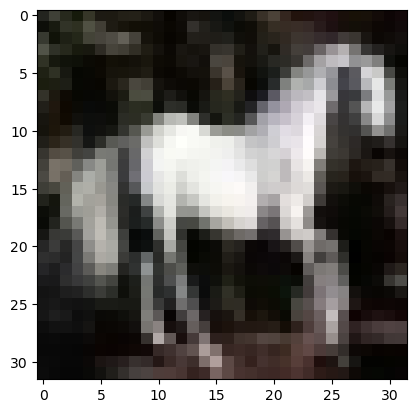

In [17]:
plt.imshow(x_test[13])

## 3. Rede Neural Convolucional

In [11]:
# obs.: uma boa prática é usar o padding same para a Camada de Convolução e valida para a Camada de Pooling

model = keras.Sequential([
    layers.Input((32, 32, 3)),
    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'), # 32 Kernels, Matriz do Kernel 3x3
    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=3, strides=2, padding='valid'), # Matriz do Pooling 2x2, pula de 2 em 2 colunas para fazer o cálculo do Pooling 
    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=3, strides=2, padding='valid'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [14]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=2)

Epoch 1/2
1563/1563 [==============================] - 163s 104ms/step - loss: 1.4179 - sparse_categorical_accuracy: 0.4880 - val_loss: 1.0122 - val_sparse_categorical_accuracy: 0.6531
Epoch 2/2
1563/1563 [==============================] - 162s 104ms/step - loss: 0.9955 - sparse_categorical_accuracy: 0.6512 - val_loss: 0.8944 - val_sparse_categorical_accuracy: 0.6920
